# Synthia's notebook to experiment with the data 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
import plotly.express as px

## Load Datasets

In [2]:
NSDUH2021Cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]
NSDUH201819Cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]
CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]
CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

In [122]:
NSDUH2019_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt", NSDUH201819Cols)
NSDUH2018_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv", NSDUH201819Cols)
NSDUH2021_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt", NSDUH2021Cols)

In [89]:
CoreTrends2021_wantedCols = readInAndGetWantedColumns("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv", CoreTrends2021Cols)
CoreTrends2019_wantedCols = readInAndGetWantedColumns("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv", CoreTrends2019Cols)
CoreTrends2018_wantedCols = readInAndGetWantedColumns("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv", CoreTrends2018Cols)


In [94]:
print(CoreTrends2019_wantedCols.head())

   web1a  web1b  web1c  web1d  web1e sns2a sns2b sns2c sns2d sns2e  sex  age
0      2      2      1      2      1                 1           5    2   75
1      2      2      2      2      2                                  1   56
2      1      1      1      2      1     2     4     3           5    2   65
3      2      2      1      2      1                 2           4    2   67
4      2      2      1      2      1                 3           5    1   64


In [117]:
CoreTrends2018_wantedCols = CoreTrends2018_wantedCols.rename(columns={"sex": "gender"})
CoreTrends2019_wantedCols = CoreTrends2019_wantedCols.rename(columns={"sex": "gender"})
CT2021_slim = CoreTrends2021_wantedCols[['age', 'gender']]
CT2019_slim = CoreTrends2019_wantedCols[['age', 'gender']]
CT2018_slim = CoreTrends2018_wantedCols[['age', 'gender']]
testCT2 = pd.concat([CT2021_slim, CT2019_slim, CT2018_slim])
testCT2 = testCT2[testCT2['gender'] < 4]

testCT2['age'] = pd.cut(testCT2['age'], bins=[0, 26, 35, 50, 65, 97],
                       labels=["Gen Z", "Millennials", "Gen X", "Young Boomers", "Older Boomers"])
testCT2['gender'] = pd.cut(testCT2['gender'], bins=[0, 1, 2, 3],
                       labels=["Woman", "Man", "Other"])


Text(0.5, 0, 'Generation')

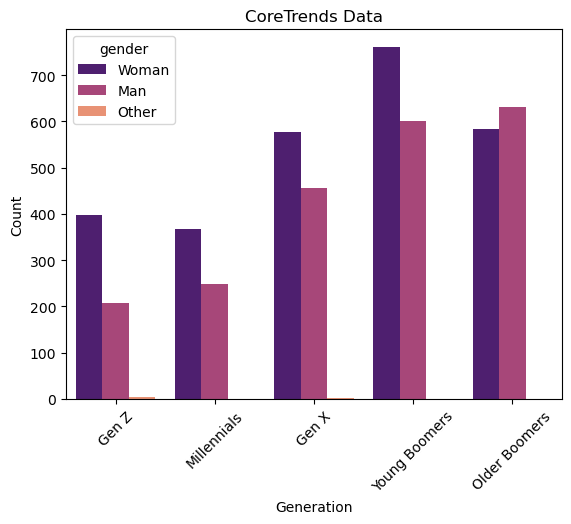

In [118]:
sns.countplot(testCT2, x='age', hue='gender', palette="magma")
plt.xticks(rotation=45)
plt.title("CoreTrends Data")
plt.ylabel("Count")
plt.xlabel("Generation")

In [125]:
NSDUH2021_wantedCols = NSDUH2021_wantedCols.rename(columns={"AGE3": "AGE2"})
NS2021_slim = NSDUH2021_wantedCols[['AGE2', 'IRSEX']]
NS2019_slim = NSDUH2019_wantedCols[['AGE2', 'IRSEX']]
NS2018_slim = NSDUH2018_wantedCols[['AGE2', 'IRSEX']]

NS2021_slim = NS2021_slim[NS2021_slim['AGE2'] < 98]
NS2019_slim = NS2019_slim[NS2019_slim['AGE2'] < 98]
NS2018_slim = NS2018_slim[NS2018_slim['AGE2'] < 98]

NS2019_slim['AGE2'] = pd.cut(NS2019_slim['AGE2'], bins=[0, 13, 15, 16, 17, float('inf')],
                       labels=["Gen Z", "Millennials", "Gen X", "Young Boomers", "Older Boomers"])
NS2018_slim['AGE2'] = pd.cut(NS2018_slim['AGE2'], bins=[0, 13, 15, 16, 17, float('inf')],
                       labels=["Gen Z", "Millennials", "Gen X", "Young Boomers", "Older Boomers"])
NS2021_slim['AGE2'] = pd.cut(NS2021_slim['AGE2'], bins=[0, 7, 9, 10, 11, float('inf')],
                       labels=["Gen Z", "Millennials", "Gen X", "Young Boomers", "Older Boomers"])
testNS2 = pd.concat([NS2021_slim, NS2019_slim, NS2018_slim])

testNS2['IRSEX'] = pd.cut(testNS2['IRSEX'], bins=[0, 1, 2],
                       labels=["Man", "Woman"])
testNS2 = testNS2.rename(columns={"IRSEX": "Gender"})

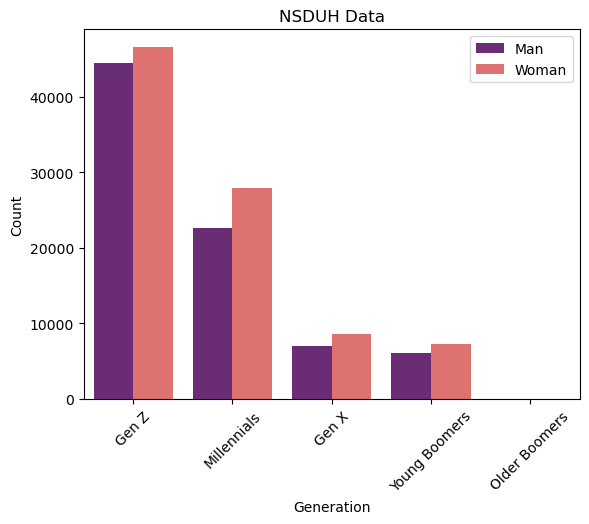

In [130]:
sns.countplot(testNS2, x='AGE2', hue='Gender', palette="magma")
plt.xticks(rotation=45)
plt.title("NSDUH Data")
plt.ylabel("Count")
plt.xlabel("Generation")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1));

## Clean up data


###ADMT16 - ADMT21  : How many visits to various types of outpatient facilities for mental health


<br>AGE3: age (intervals of 2, e.g. 1 = age 12 or 13, up to age 65)
<br>IRSEX: gender 1=male, 2=female

<br>AUINPYR : stayed in hospital for mental health
<br>ADMT25/ADMTREF25 : AURXYR : taken any medication for mental health

<br>YEATNDYR : HAs attended some sort of school
<br>YESCHFLT : how much they like going to school (1-4, 4=hated it)
<br>YEPRBSLV : participated in self-esteem group

<br>DSTNRV30 : How often felt nervous (1-5, 5=never) in past 30 days
<br> : DSTHOP30 : How often feel hopeless
<br> : DSTCHR30 : How often felt depressed
<br> : DSTNGD30 : How often feeling down/worthless
<br> : DSTWORST : In past year has there been a worse month than current (1-2, 2=No)
<br> : DSTNRV12 : in WORST30 month, how often felt nervous
<br> : DSTHOP12 : In WORST30 month, how often felt hopeless
<br> : DSTCHR12 : in WORST30 month, how often felt depressed
<br> : DSTNGD12 : in WORST30 month, how often felt worthless

<br> : IMPCONCN : Difficulty concentrating in their worst month (1-4, 4= severe)
<br> : IMPGOUT : Difficulty leaving house
<br> : IMPPEOP : Difficulty dealing with less known people
<br> : IMPSOC : Difficulty participating in social activites
<br> : IMPSOCM : Did mental health problems keep from participating socially

<br> : SUICTHNK : Think about suicide in past year
<br> : SUIPLANYR :  Plans for suicide

<br> : ADDPREV : Long periods of feeling sad


Core trends variables:

web1a    -	Twitter
web1b    -	Instagram
web1c    -	Facebook 
web1d    -	Snapchat
web1e    -	YouTube

How often use social media, 1-5, 5=less often

sns2a    -	Twitter
sns2b    -	Instagram
sns2c    -	Facebook 
sns2d    -	Snapchat
sns2e    -	YouTube

gender  - gender
age     - age



In [5]:
CoreTrends_id = ['age']
# CoreTrends_values = ["web1a", "web1b", "web1c", "web1d", "web1e"]
CoreTrends_values = ["sns2a", "sns2b", "sns2c", "sns2d", "sns2e"]
NSDUH_id=['AGE2']; NSDUH_values = ['DSTCHR12']
CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols, CoreTrends_id, CoreTrends_values)
CoreTrends2019_long = cleanUpCoreTrends(CoreTrends2019_wantedCols, CoreTrends_id, CoreTrends_values)
CoreTrends2021_long = cleanUpCoreTrends(CoreTrends2021_wantedCols, CoreTrends_id, CoreTrends_values)
NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols,NSDUH_id,NSDUH_values)
NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols,NSDUH_id,NSDUH_values)
NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols,['AGE3'],NSDUH_values)


KeyError: "The following 'value_vars' are not present in the DataFrame: ['sns2a']"

In [84]:
def cleanUpCT(df, id, values):
    # df = df.drop(columns=['sns2a'])

    df = df.apply(pd.to_numeric, errors='coerce')

    #Remove refused ages
    df = df[df['age'] < 98]

    #Put age into bins
    # df['age'] = pd.cut(df['age'], bins=[0, 26, 35, 50, 65, 97],
    #                    labels=['18-25', '26-34', '35-49', '50-64', '65+'])
    df['age'] = pd.cut(df['age'], bins=[0, 26, 35, 50, 65, 97],
                       labels=["Gen Z", "Millennials", "Gen X", "Young Boomers", "Older Boomers"])
    # df['age'] = pd.cut(df['age'], bins=[0, 26, 35, 50, 65, 97],
    #                     labels=[0, 1, 2, 3, 4])
    # df = df.fillna(0)

    df['totalFreq'] = df[["sns2a", "sns2b", "sns2c", "sns2d", "sns2e"]].sum(axis=1)
    #Convert to long form
    df = pd.melt(df, id_vars=id, value_vars=values)
    df=df.rename(columns={"value": "Frequency of Social Media Use", "age":"Generations"})
    # print(totalCount)
    return df

In [85]:
CoreTrends_id = ['age']
# CoreTrends_values = ["sns2a", "sns2b", "sns2c", "sns2d", "sns2e"]
CoreTrends_values = ["totalFreq"]
CoreTrends2018_long = cleanUpCT(CoreTrends2018_wantedCols, CoreTrends_id, CoreTrends_values)
CoreTrends2019_long = cleanUpCT(CoreTrends2019_wantedCols, CoreTrends_id, CoreTrends_values)
CoreTrends2021_long = cleanUpCT(CoreTrends2019_wantedCols, CoreTrends_id, CoreTrends_values)

In [86]:
expCT1 = pd.concat([CoreTrends2018_long,CoreTrends2019_long, CoreTrends2021_long])

In [62]:
expCT1.head(5)

,age,variable,Frequency of use across social media platforms
0,26-34,totalFreq,8.0
1,65+,totalFreq,0.0
2,50-64,totalFreq,3.0
3,50-64,totalFreq,5.0
4,50-64,totalFreq,6.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Gen Z'),
  Text(1, 0, 'Millennials'),
  Text(2, 0, 'Gen X'),
  Text(3, 0, 'Young Boomers'),
  Text(4, 0, 'Older Boomers')])

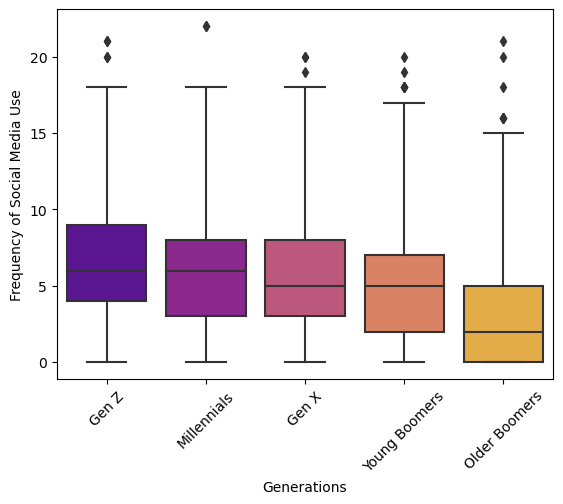

In [87]:
sns.boxplot(data=expCT1, x='Generations', y="Frequency of Social Media Use", whis=2, palette="plasma")
plt.xticks(rotation=45)

In [9]:
percDepressed_NSDUH2018 = getPercentage(NSDUH2018_long, "Depressed", "age", 2018)
percDepressed_NSDUH2019 = getPercentage(NSDUH2019_long, "Depressed", "age", 2019)
percDepressed_NSDUH2021 = getPercentage(NSDUH2021_long, "Depressed", "age", 2021)
SMUse_sum_CoreTrends2018 = getPercentage(CoreTrends2018_long, "Uses Social Media", "age", 2018)
SMUse_sum_CoreTrends2019 = getPercentage(CoreTrends2019_long, "Uses Social Media", "age", 2019)
SMUse_sum_CoreTrends2021 = getPercentage(CoreTrends2021_long, "Uses Social Media", "age", 2021)

CoreTrends_SMUseSum_concat = pd.concat([SMUse_sum_CoreTrends2018,SMUse_sum_CoreTrends2019, SMUse_sum_CoreTrends2021]);NSDUH_concat = pd.concat([percDepressed_NSDUH2018,percDepressed_NSDUH2019,percDepressed_NSDUH2021])

<Axes: xlabel='age', ylabel='percentage'>

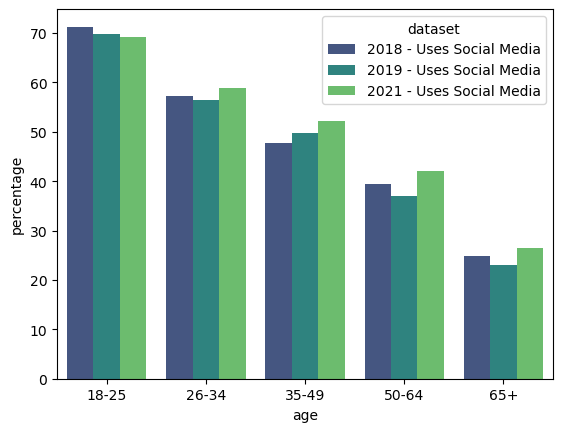

In [ ]:
sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='percentage', hue='dataset' ,palette='viridis')


In [ ]:
id=['AGE2']
id2=['AGE3']
# values = ['IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
#             'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
#             'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
#             'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV']
values = ['DSTCHR12']

NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols,id,values, 2018)
NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols,id,values, 2019)
NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols,id2,values, 2021)


In [ ]:
percDepressed_NSDUH2018 = getPercentage(NSDUH2018_long, "Depressed", "age", 2018)
percDepressed_NSDUH2019 = getPercentage(NSDUH2019_long, "Depressed", "age", 2019)
percDepressed_NSDUH2021 = getPercentage(NSDUH2021_long, "Depressed", "age", 2021)

In [ ]:
NSDUH_concat = pd.concat([percDepressed_NSDUH2018,percDepressed_NSDUH2019,percDepressed_NSDUH2021])

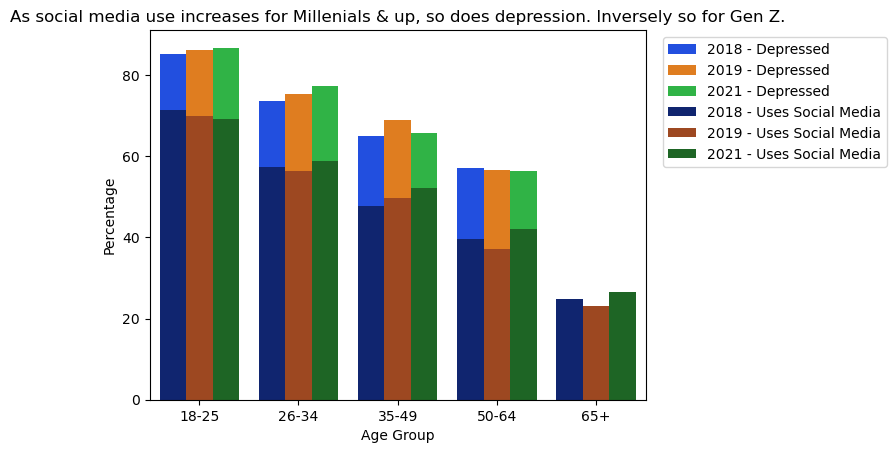

In [ ]:
sns.barplot(data=NSDUH_concat, x='age', y='percentage',hue='dataset', palette='bright')
# sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='percentage', hue='dataset' ,palette='dark')

plt.title("As social media use increases for Millenials & up, so does depression. Inversely so for Gen Z.")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

## Part 2

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
import plotly.express as px
from helper_code import readInAndGetWantedColumns


In [ ]:
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]
CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]
CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2021_wantedCols = readInAndGetWantedColumns("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv", CoreTrends2021Cols)
CoreTrends2019_wantedCols = readInAndGetWantedColumns("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv", CoreTrends2019Cols)
CoreTrends2018_wantedCols = readInAndGetWantedColumns("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv", CoreTrends2018Cols)

In [ ]:
print(CoreTrends2021_wantedCols.shape)
print(CoreTrends2019_wantedCols.shape)
print(CoreTrends2018_wantedCols.shape)
print()

(1502, 12)
(1502, 12)
(2002, 12)



In [ ]:
# CoreTrends2021_wantedCols['year'] = 2021
# CoreTrends2019_wantedCols['year'] = 2019
# CoreTrends2018_wantedCols['year'] = 2018

CoreTrends2021_wantedCols.rename(columns={'gender': 'sex'}, inplace=True)

#Concat all dataframes and convert answers to numeric
CoreTrends_all = pd.concat([CoreTrends2018_wantedCols,CoreTrends2019_wantedCols, CoreTrends2021_wantedCols], ignore_index=True)

#code cleanup
CoreTrends_all = CoreTrends_all.apply(pd.to_numeric, errors='coerce')
CoreTrends_all.fillna(0, inplace=True)

web1_SMused = ["web1a", "web1b", "web1c", "web1d", "web1e"]
sns_SMfrequency = ["sns2a", "sns2b", "sns2c", "sns2d", "sns2e"]

CoreTrends_all = CoreTrends_all[CoreTrends_all['age'] < 98]
CoreTrends_all = CoreTrends_all[CoreTrends_all['sex'] < 98]
mask = CoreTrends_all[["sns2a", "sns2b", "sns2c", "sns2d", "sns2e","web1a", "web1b", "web1c", "web1d", "web1e"]] >= 8
CoreTrends_all[~mask.any(axis=1)]
CoreTrends_all[web1_SMused] = CoreTrends_all[web1_SMused].replace(2,0)

#create sum columns
CoreTrends_all['SM_usedTotal'] = (CoreTrends_all[["web1a", "web1b", "web1c", "web1d", "web1e"]]==1).sum(axis=1)
CoreTrends_all['SM_frequencySum'] = CoreTrends_all[["sns2a", "sns2b", "sns2c", "sns2d", "sns2e"]].sum(axis=1)
# CoreTrends_all.drop(["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e"], axis=1)

In [ ]:
print(CoreTrends_all.head())
print(CoreTrends_all.shape)
print(type(CoreTrends_all))

   web1a  web1b  web1c  web1d  web1e  sns2a  sns2b  sns2c  sns2d  sns2e  sex  \
0    2.0    1.0    1.0    1.0    1.0    0.0    1.0    1.0    3.0    3.0    2   
1    2.0    2.0    2.0    2.0    2.0    0.0    0.0    0.0    0.0    0.0    2   
3    2.0    2.0    1.0    2.0    2.0    0.0    0.0    3.0    0.0    0.0    2   
4    2.0    2.0    1.0    2.0    1.0    0.0    0.0    3.0    0.0    2.0    1   
5    1.0    2.0    1.0    2.0    1.0    2.0    0.0    1.0    0.0    3.0    1   

   age  SM_usedTotal  SM_frequencySum  
0   33             4              8.0  
1   76             0              0.0  
3   60             1              3.0  
4   55             2              5.0  
5   58             3              6.0  
(4846, 14)
<class 'pandas.core.frame.DataFrame'>


# PART 3

In [2]:
NSDUH2021Cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]
NSDUH201819Cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]
CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]
CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

In [3]:
CoreTrends2021_wantedCols = readInAndGetWantedColumns("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv", CoreTrends2021Cols)
CoreTrends2019_wantedCols = readInAndGetWantedColumns("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv", CoreTrends2019Cols)
CoreTrends2018_wantedCols = readInAndGetWantedColumns("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv", CoreTrends2018Cols)

In [4]:
NSDUH2019_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt", NSDUH201819Cols)
NSDUH2018_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv", NSDUH201819Cols)
NSDUH2021_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt", NSDUH2021Cols)

In [5]:
CoreTrends_id = ['age']; CoreTrends_values = ["web1a", "web1b", "web1c", "web1d", "web1e"]
NSDUH_id=['AGE2']; NSDUH_values = ['DSTCHR12']
CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols, CoreTrends_id, CoreTrends_values)
CoreTrends2019_long = cleanUpCoreTrends(CoreTrends2019_wantedCols, CoreTrends_id, CoreTrends_values)
CoreTrends2021_long = cleanUpCoreTrends(CoreTrends2021_wantedCols, CoreTrends_id, CoreTrends_values)
NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols,NSDUH_id,NSDUH_values)
NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols,NSDUH_id,NSDUH_values)
NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols,['AGE3'],NSDUH_values)


In [6]:
percDepressed_NSDUH2018 = getPercentage(NSDUH2018_long, "Depressed", "age", 2018)
percDepressed_NSDUH2019 = getPercentage(NSDUH2019_long, "Depressed", "age", 2019)
percDepressed_NSDUH2021 = getPercentage(NSDUH2021_long, "Depressed", "age", 2021)
SMUse_sum_CoreTrends2018 = getPercentage(CoreTrends2018_long, "Uses Social Media", "age", 2018)
SMUse_sum_CoreTrends2019 = getPercentage(CoreTrends2019_long, "Uses Social Media", "age", 2019)
SMUse_sum_CoreTrends2021 = getPercentage(CoreTrends2021_long, "Uses Social Media", "age", 2021)

CoreTrends_SMUseSum_concat = pd.concat([SMUse_sum_CoreTrends2018,SMUse_sum_CoreTrends2019, SMUse_sum_CoreTrends2021])
NSDUH_concat = pd.concat([percDepressed_NSDUH2018,percDepressed_NSDUH2019,percDepressed_NSDUH2021])

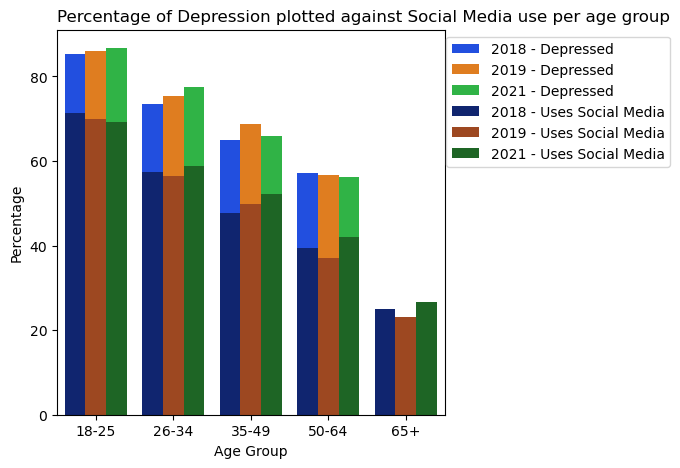

In [20]:
plt.figure(figsize=(5, 5))
sns.barplot(data=NSDUH_concat, x='age', y='percentage',hue='dataset', palette='bright')
sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='percentage', hue='dataset' ,palette='dark')
plt.title("Percentage of Depression plotted against Social Media use per age group", loc='left')
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

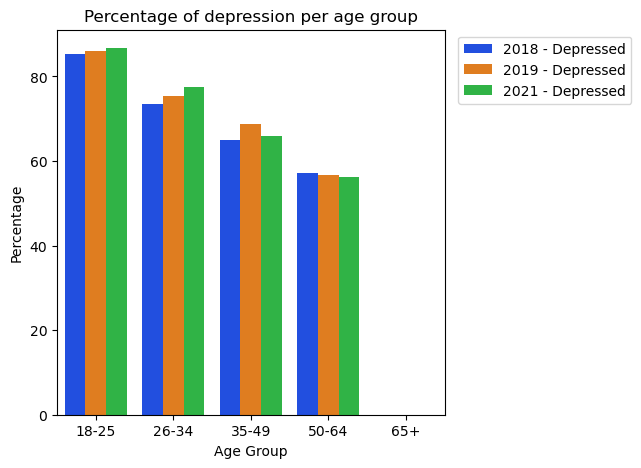

In [15]:
plt.figure(figsize=(5, 5))
sns.barplot(data=NSDUH_concat, x='age', y='percentage',hue='dataset', palette='bright')
plt.title("Percentage of depression per age group")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

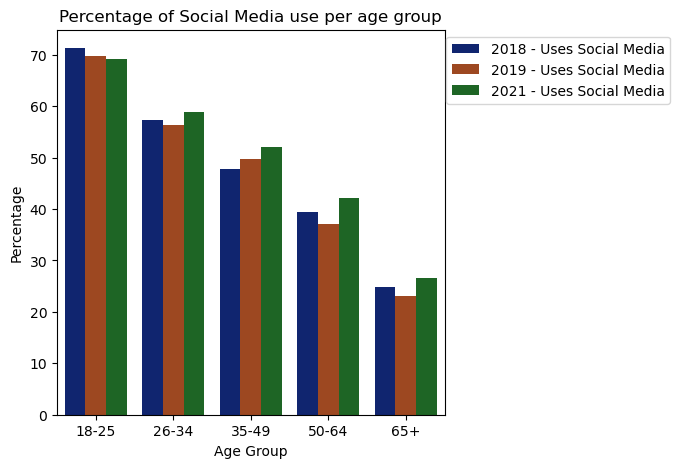

In [17]:
plt.figure(figsize=(5, 5))
sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='percentage', hue='dataset' ,palette='dark')
plt.title("Percentage of Social Media use per age group")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

Part 4: NSDUH cleaning

In [25]:
NSDUH2021Cols = ["CATAG6", "AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]
NSDUH201819Cols = ["CATAG6", "AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]
NSDUH2019_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt", NSDUH201819Cols)
NSDUH2018_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv", NSDUH201819Cols)
NSDUH2021_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt", NSDUH2021Cols)

In [26]:
# NSDUH2021_wantedCols.rename(columns={'AGE3': 'AGE2'}, inplace=True)
# #Create buckets for consistent labels for age
# NSDUH2018_wantedCols['AGE2'] = pd.cut(NSDUH2018_wantedCols['AGE2'], bins=[0, 13, 15, 16, 17, float('inf')],
#                        labels=[0, 1, 2, 3, 4])
# NSDUH2019_wantedCols['AGE2'] = pd.cut(NSDUH2019_wantedCols['AGE2'], bins=[0, 13, 15, 16, 17, float('inf')],
#                        labels=[0, 1, 2, 3, 4])
# NSDUH2021_wantedCols['AGE2'] = pd.cut(NSDUH2021_wantedCols['AGE2'], bins=[0, 7, 9, 10, 11, float('inf')],
#                        labels=[0, 1, 2, 3, 4])

NSDUH_all = pd.concat([NSDUH2019_wantedCols,NSDUH2018_wantedCols, NSDUH2021_wantedCols], ignore_index=True)


In [29]:
# NSDUH_slim = NSDUH_all[['AGE2', 'IRSEX', 'DSTCHR12', 'IMPSOC']]

NSDUH_slim = NSDUH_all[['CATAG6', 'IRSEX', 'DSTCHR12', 'DSTHOP12', 'IMPSOC']]
NSDUH_slim = NSDUH_slim.apply(pd.to_numeric, errors='coerce')
NSDUH_slim.fillna(0, inplace=True)

#Remove refused vals
NSDUH_slim = NSDUH_slim[NSDUH_slim['DSTCHR12'] < 85]
NSDUH_slim = NSDUH_slim[NSDUH_slim['IMPSOC'] < 85]
NSDUH_slim = NSDUH_slim[NSDUH_slim['DSTHOP12'] < 85]

In [30]:
NSDUH_slim.head()

,CATAG6,IRSEX,DSTCHR12,DSTHOP12,IMPSOC
0,4,1,3,3,3
1,6,2,5,5,2
5,5,1,2,2,2
9,4,2,3,2,4
10,4,2,4,4,2


# ML on NSDUH, experimentation

In [41]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from helper_code import *
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from ml_analysis import feature_selection


In [2]:
NSDUH2021Cols = ["CATAG6", "AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]
NSDUH201819Cols = ["CATAG6", "AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]
NSDUH2019_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt", NSDUH201819Cols)
NSDUH2018_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv", NSDUH201819Cols)
NSDUH2021_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt", NSDUH2021Cols)

In [138]:
NSDUH_all = pd.concat([NSDUH2019_wantedCols,NSDUH2018_wantedCols, NSDUH2021_wantedCols], ignore_index=True)
NSDUH_slim = NSDUH_all[['CATAG6', 'IRSEX', 'DSTCHR12', 'DSTHOP12', 'DSTCHR30', 'DSTNGD30', 'DSTNGD12', 'ADDPREV', 'DSTHOP30', 'IMPSOCM']]
NSDUH_slim = NSDUH_slim.apply(pd.to_numeric, errors='coerce')
NSDUH_slim.fillna(0, inplace=True)

#Remove refused vals
NSDUH_slim = NSDUH_slim[NSDUH_slim['DSTCHR12'] < 85]
NSDUH_slim = NSDUH_slim[NSDUH_slim['DSTHOP12'] < 85]
NSDUH_slim = NSDUH_slim[NSDUH_slim['IMPSOCM'] < 85]

In [139]:
target = "IMPSOCM"

In [140]:
NSDUH_moreslim = NSDUH_slim[['CATAG6', 'IRSEX', 'DSTCHR12', 'DSTHOP12', target]]
y = NSDUH_moreslim[[target]]
X = NSDUH_moreslim.drop([target], axis=1)

print(y.columns)
print(X.columns)
y = y.values.ravel()

Index(['IMPSOCM'], dtype='object')
Index(['CATAG6', 'IRSEX', 'DSTCHR12', 'DSTHOP12'], dtype='object')


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)

max_accuracy = float("-inf")
best_model = {}
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for {10} neighbors: {accuracy * 100:.2f}%')


Accuracy for 10 neighbors: 73.06%
